<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20CG/Bank-27/bank_ds_test_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
100% 4.35M/4.35M [00:00<00:00, 42.6MB/s]


In [3]:
df = pd.read_csv('/content/bank-test-case-ds.csv',sep=';')

In [4]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


Задание
Вам предлагается набор данных, содержащий следующие переменные
Переменные, характеризующие кредитную историю клиента
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам  
closed_creds - количество закрытых кредитов  
active_cred_sum_overdue - суммарная задолженность по активным кредитам  
active_cred_sum - сумма всех активных кредитов  
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам  
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам  
Переменные характеризующие клиента  
age - возраст  
gender - пол  
region - регион  
month_income - ежемесячный доход  
Переменные, характеризующие кредит, по которому нужно сделать
прогноз  
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)  
first_days_quant - срок, на которую клиент хочет взять кредит  
loan_cost_all - одобренная клиенту сумма кредита  
order_date - дата подачи заявки на получение кредита  
cost_all - сумма всех выплат по одобренному кредиту  
order_id - id заявки  
client_id - id клиента  
Целевая переменная:  
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)  
Необходимо на основе предоставленных данных построить модель для предсказания
целевой переменной. Сделать описание проделанных шагов
● Анализ данных
● Фильтрация
● Преобразование переменных
● Моделирование
● Оценка качества модели
Обоснование выбранной метрики качества.

In [5]:
df['expert']

,expert
0,1
1,1
2,1
3,1
4,1
...,...
49996,1
49997,1
49998,1
49999,1


In [6]:
df['expert'].value_counts()

,count
expert,
1,37464
0,12537


In [7]:
df['expert'].value_counts(normalize=True)

,proportion
expert,
1,0.749265
0,0.250735


In [8]:
df['expert'].mean()

np.float64(0.749265014699706)

In [9]:
df.isna().mean()

,0
closed_cred_sum,0.00000
closed_creds,0.00000
active_cred_sum_overdue,0.00000
active_cred_sum,0.00000
active_cred_day_overdue,0.00000
active_cred_max_overdue,0.00000
age,0.00000
gender,0.00000
region,0.00000
first_loan,0.00038


In [10]:
df.describe()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
count,5.000100e+04,50001.000000,5.000100e+04,5.000100e+04,50001.000000,5.000100e+04,50001.000000,50001.000000,50001.000000,49982.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,1.865780e+05,7.974001,5.217919e+04,1.964205e+05,722.563769,3.776984e+04,35.018900,0.462691,28.825083,7751.682606,6703.681926,23.954561,24943.402642,1233.828788,734747.279874,290563.956781,0.749265
std,5.057408e+05,13.933307,2.537311e+05,4.365213e+05,1371.656677,1.703992e+05,11.235206,0.498611,29.726162,5310.782009,4610.529844,36.670176,20652.768218,4556.672041,26254.078989,74592.964584,0.433441
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,695828.000000,109.000000,0.000000
25%,5.502000e+03,1.000000,0.000000e+00,1.467400e+04,0.000000,4.870800e+02,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,715042.000000,294858.000000,0.000000
50%,4.287400e+04,4.000000,5.000000e+03,5.703022e+04,64.000000,6.765660e+03,32.000000,0.000000,25.000000,7000.000000,7000.000000,20.000000,25000.000000,0.000000,734707.000000,316156.000000,1.000000
75%,1.740713e+05,9.000000,3.157990e+04,1.972360e+05,923.000000,2.449949e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,749477.000000,330172.000000,1.000000
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000


In [11]:
df.dtypes

,0
closed_cred_sum,float64
closed_creds,int64
active_cred_sum_overdue,float64
active_cred_sum,float64
active_cred_day_overdue,int64
active_cred_max_overdue,float64
age,int64
gender,int64
region,int64
first_loan,float64


In [12]:
df[['gender','region']] = df[['gender','region']].astype(str)

In [13]:
train = df.sample(frac=0.7,random_state=42).copy()

In [14]:
val = df[~df.index.isin(train.index)]

In [15]:
len(df)

50001

In [16]:
len(train) + len(val)

50001

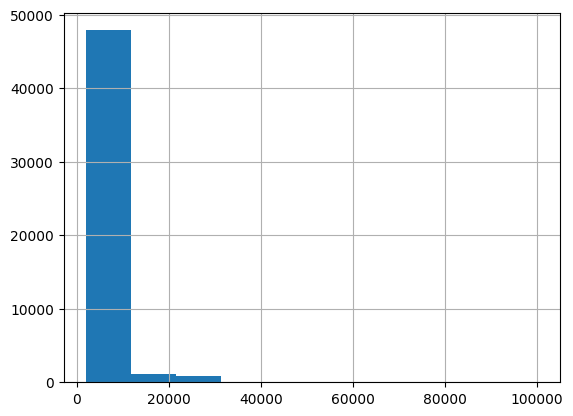

In [17]:
df['first_loan'].hist();

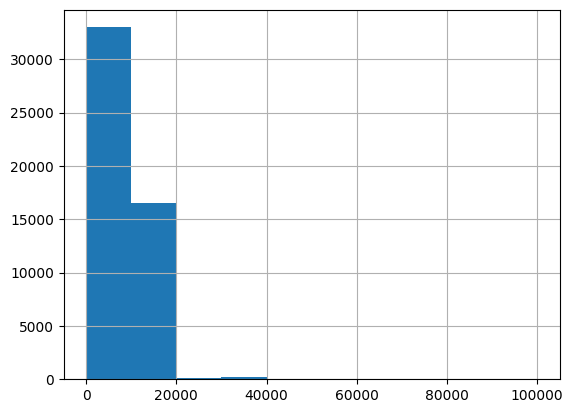

In [18]:
df['loan_cost_all'].hist();

In [19]:
df[['first_loan','loan_cost_all']].describe()

,first_loan,loan_cost_all
count,49982.000000,50001.000000
mean,7751.682606,6703.681926
std,5310.782009,4610.529844
min,2000.000000,0.000000
25%,5000.000000,3000.000000
50%,7000.000000,7000.000000
75%,10000.000000,10000.000000
max,100000.000000,100000.000000


In [20]:
df['first_loan'].value_counts(dropna=False).sort_values(ascending=False).reset_index()

,first_loan,count
0,10000.0,18614
1,7000.0,8200
2,5000.0,6247
3,2000.0,4783
4,3000.0,3902
...,...,...
65,9900.0,1
66,95000.0,1
67,79000.0,1
68,43000.0,1


In [21]:
! pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.2 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostClassifier

In [23]:
df.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income', 'order_date', 'cost_all',
       'order_id', 'client_id', 'expert'],
      dtype='object')

In [24]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [25]:
df['region'].value_counts()

,count
region,
0,20061
40,4185
36,1921
75,1778
65,1614
...,...
44,19
85,17
43,16


In [26]:
df['order_date'].agg(['min','max'])

,order_date
min,2017-06-26
max,2017-09-25


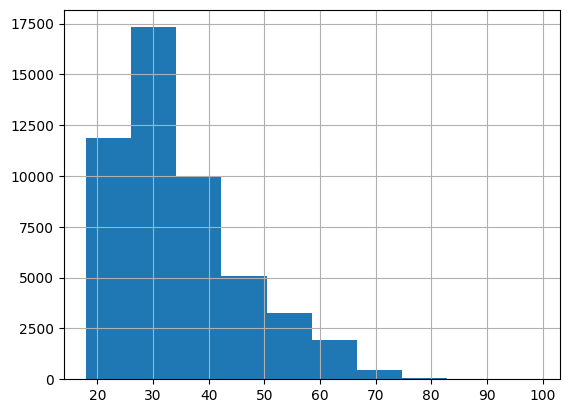

In [27]:
df['age'].hist();

In [28]:
df['age'].describe()

,age
count,50001.000000
mean,35.018900
std,11.235206
min,18.000000
25%,27.000000
50%,32.000000
75%,41.000000
max,99.000000


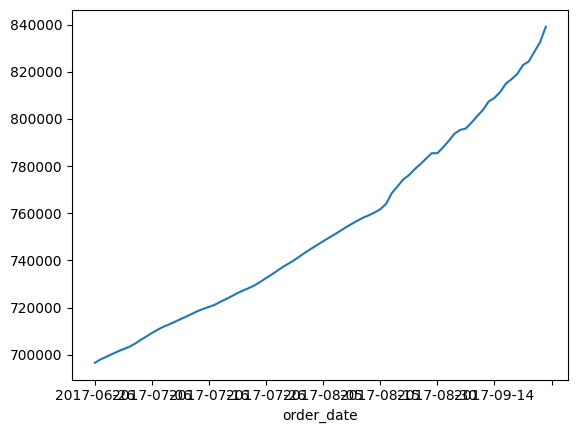

In [29]:
df.groupby('order_date')['order_id'].mean().plot();

In [30]:
X_col = ['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'first_loan',
       'first_days_quant', 'month_income',
       'client_id', 'gender', 'region']

cat_features = ['gender', 'region']

y_col = ['expert']

In [31]:
model = CatBoostClassifier(verbose=100,
                           random_state=42,
                           learning_rate=0.5,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                           cat_features=cat_features
                           )

In [32]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.8703715	best: 0.8703715 (0)	total: 116ms	remaining: 1m 56s
100:	test: 0.9441178	best: 0.9441178 (100)	total: 10s	remaining: 1m 29s
200:	test: 0.9459992	best: 0.9461400 (167)	total: 20.4s	remaining: 1m 20s
300:	test: 0.9468176	best: 0.9469663 (265)	total: 26s	remaining: 1m
400:	test: 0.9476001	best: 0.9476765 (387)	total: 30s	remaining: 44.8s
500:	test: 0.9484574	best: 0.9486474 (495)	total: 34.8s	remaining: 34.7s
600:	test: 0.9485748	best: 0.9487407 (582)	total: 38.5s	remaining: 25.5s
700:	test: 0.9486368	best: 0.9487417 (633)	total: 42.1s	remaining: 17.9s
800:	test: 0.9492124	best: 0.9492575 (797)	total: 47.1s	remaining: 11.7s
900:	test: 0.9494020	best: 0.9494097 (898)	total: 50.7s	remaining: 5.57s
999:	test: 0.9496165	best: 0.9496848 (989)	total: 54.1s	remaining: 0us

bestTest = 0.9496847863
bestIteration = 989

Shrink model to first 990 iterations.


In [33]:
fi = pd.DataFrame({'w':model.feature_importances_,'name':X_col})

In [34]:
fi.sort_values('w',ascending=False)

,w,name
8,14.691746,first_days_quant
10,12.576234,client_id
9,10.023964,month_income
0,8.394945,closed_cred_sum
3,8.347118,active_cred_sum
6,7.329569,age
5,7.316254,active_cred_max_overdue
2,6.784682,active_cred_sum_overdue
7,6.083783,first_loan
1,6.057225,closed_creds


In [35]:
! pip install shap

In [36]:
import shap

explainer = shap.Explainer(model)  # или другой тип Explainer, в зависимости от модели

shap_values = explainer(train[X_col])



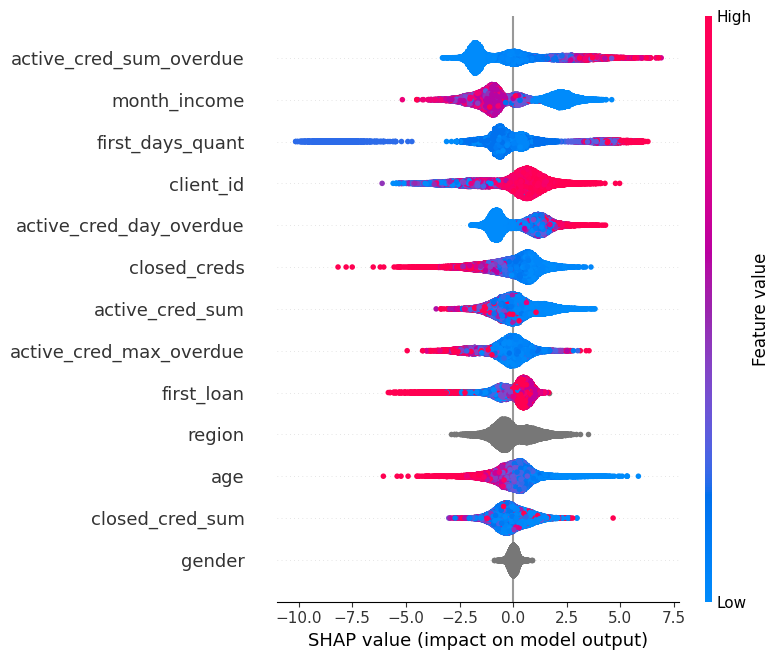

In [37]:
shap.summary_plot(shap_values, train[X_col])

In [38]:
df['income_cat'] = pd.qcut(df['month_income'],5,duplicates='drop')

In [39]:
df.groupby('income_cat')['expert'].agg(['count','mean'])

<ipython-input-39-a3c513e64fe5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_cat')['expert'].agg(['count','mean'])


,count,mean
income_cat,,
"(-0.001, 20000.0]",22972,0.863225
"(20000.0, 35000.0]",15817,0.684896
"(35000.0, 50000.0]",8401,0.601476
"(50000.0, 550000.0]",2811,0.621843


In [40]:
df['client_cat'] = pd.qcut(df['client_id'],5,duplicates='drop')


In [41]:
df.groupby('client_cat')['expert'].agg(['count','mean'])

<ipython-input-41-64805f8449e1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('client_cat')['expert'].agg(['count','mean'])


,count,mean
client_cat,,
"(108.999, 274066.0]",10001,0.455954
"(274066.0, 310588.0]",10000,0.716700
"(310588.0, 322138.0]",10000,0.816000
"(322138.0, 332110.0]",10000,0.869500
"(332110.0, 393528.0]",10000,0.888200


In [42]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,income_cat,client_cat
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1,"(-0.001, 20000.0]","(310588.0, 322138.0]"
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1,"(-0.001, 20000.0]","(274066.0, 310588.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1,"(-0.001, 20000.0]","(108.999, 274066.0]"
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1,"(-0.001, 20000.0]","(332110.0, 393528.0]"
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(20000.0, 35000.0]","(332110.0, 393528.0]"
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(20000.0, 35000.0]","(332110.0, 393528.0]"


In [43]:
df['term_cat'] = pd.qcut(df['first_days_quant'],5,duplicates='drop')

In [44]:
df.groupby('term_cat')['expert'].agg(['mean','count'])

<ipython-input-44-0f67d03b31cd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('term_cat')['expert'].agg(['mean','count'])


,mean,count
term_cat,,
"(-0.001, 10.0]",0.775424,12606
"(10.0, 14.0]",0.782866,7447
"(14.0, 20.0]",0.654801,19131
"(20.0, 21.0]",0.983274,3647
"(21.0, 336.0]",0.801395,7170


In [45]:
val['score'] = model.predict_proba(val[X_col])[:,1]

<ipython-input-45-b06f72a2988d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['score'] = model.predict_proba(val[X_col])[:,1]


In [46]:
val

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1,0.999996
5,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0,0.041321
9,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1,1.000000
10,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1,0.999835
12,0.0,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1,0.989989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49986,0.0,0,0.00,0.00,0,0.00,20,1,0,7000.0,7000,20,20000.0,2017-08-13,0.0,759492,338248,1,0.999966
49995,0.0,0,26758.57,25000.00,371,26758.57,44,1,42,3000.0,1000,23,50000.0,2017-08-13,1545.0,759462,338231,0,0.002401
49996,0.0,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1,0.999997


In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

In [48]:
roc_auc_score(val['expert'],val['score'])

np.float64(0.9496847862832667)

In [49]:
fpr, tpr, thr = roc_curve(val['expert'],val['score'])

In [50]:
roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

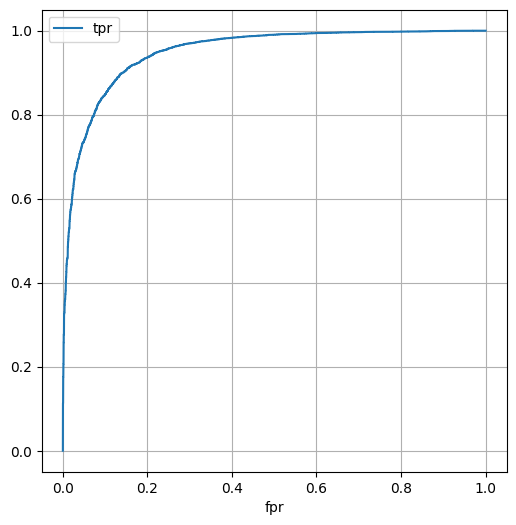

In [51]:
roc.plot(x='fpr',y='tpr',figsize=(6,6),grid=True);

In [52]:
roc['tpr-fpr'] = roc['tpr'] - roc['fpr']

In [53]:
pd.set_option('display.float_format', lambda x: '%3f' % x)

In [54]:
roc.sort_values('tpr-fpr',ascending=False)[['thr','fpr','tpr','tpr-fpr']]

,thr,fpr,tpr,tpr-fpr
1769,0.811257,0.135854,0.896910,0.761056
1767,0.812629,0.135593,0.896641,0.761048
1771,0.810904,0.136115,0.897089,0.760974
1770,0.811128,0.136115,0.896910,0.760795
1768,0.812297,0.135854,0.896641,0.760787
...,...,...,...,...
3,1.000000,0.000000,0.001254,0.001254
2,1.000000,0.000000,0.001075,0.001075
1,1.000000,0.000000,0.000090,0.000090
0,inf,0.000000,0.000000,0.000000


In [55]:
roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[:]

,thr
1769,0.811257
1767,0.812629
1771,0.810904
1770,0.811128
1768,0.812297
...,...
3,1.000000
2,1.000000
1,1.000000
0,inf


In [56]:
best_thr = roc.sort_values('tpr-fpr',ascending=False)['thr'].iloc[0]

In [57]:
val['y_pred'] = (val['score'] >= best_thr)*1

<ipython-input-57-a641c38fe2c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['y_pred'] = (val['score'] >= best_thr)*1


In [58]:
val

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,score,y_pred
2,51356.000000,2,3000.000000,3000.000000,8,3000.000000,28,1,3,10000.000000,10000,84,0.000000,2017-07-23,0.000000,728323,320467,1,0.999996,1
5,786916.000000,11,0.000000,1063763.000000,0,10395.390000,47,0,38,10000.000000,5500,14,50000.000000,2017-07-23,0.000000,728526,320564,0,0.041321,0
9,0.000000,0,21143.000000,21143.000000,1016,10924.000000,28,1,0,10000.000000,10000,90,0.000000,2017-07-23,0.000000,728454,123851,1,1.000000,1
10,0.000000,0,21143.000000,21143.000000,1016,10924.000000,28,1,0,10000.000000,10000,15,30000.000000,2017-07-23,0.000000,728553,123851,1,0.999835,1
12,0.000000,0,0.000000,8000.000000,0,0.000000,24,1,80,7000.000000,7000,10,35000.000000,2017-07-23,0.000000,728476,320544,1,0.989989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,0.000000,0,0.000000,0.000000,0,0.000000,20,1,0,7000.000000,7000,20,20000.000000,2017-08-13,0.000000,759492,338248,1,0.999966,1
49986,0.000000,0,0.000000,0.000000,0,0.000000,20,1,0,7000.000000,7000,20,20000.000000,2017-08-13,0.000000,759492,338248,1,0.999966,1
49995,0.000000,0,26758.570000,25000.000000,371,26758.570000,44,1,42,3000.000000,1000,23,50000.000000,2017-08-13,1545.000000,759462,338231,0,0.002401,0
49996,0.000000,0,74662.610000,79662.610000,2593,42204.550000,27,1,0,4000.000000,4000,20,0.000000,2017-08-13,0.000000,759472,96091,1,0.999997,1


In [59]:
val['y_pred'].mean()

np.float64(0.7023333333333334)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(classification_report(val['expert'],val['y_pred']))


              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3835
           1       0.95      0.90      0.92     11165

    accuracy                           0.89     15000
   macro avg       0.85      0.88      0.86     15000
weighted avg       0.90      0.89      0.89     15000



In [62]:
confusion_matrix(val['expert'],val['y_pred'])

array([[ 3314,   521],
       [ 1151, 10014]])

In [63]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['y_pred']).ravel()

<Axes: >

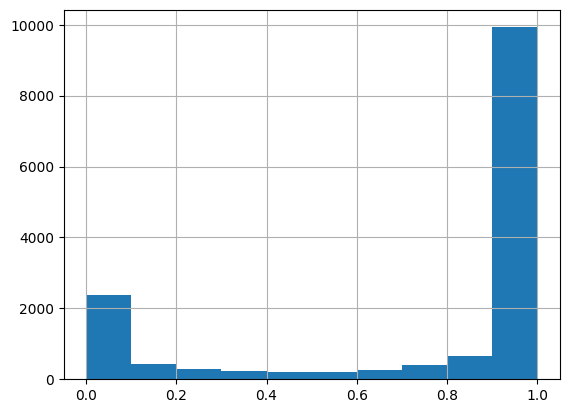

In [64]:
val['score'].hist()

In [65]:
fn

np.int64(1151)

In [66]:
fp

np.int64(521)

In [67]:
roc['thr'].unique()

array([           inf, 1.00000000e+00, 1.00000000e+00, ...,
       3.19145042e-06, 3.11007941e-06, 2.26192465e-08])

In [68]:
thrs = [0] + list(np.sort(val['score'].unique()))

In [69]:
thr = thrs[123]

In [70]:
val['pred'] = (val['score'] > thr)*1

<ipython-input-70-5df956f7c83a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred'] = (val['score'] > thr)*1


In [71]:
tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()

In [72]:
from tqdm import tqdm

In [78]:
res = []

for thr in tqdm(thrs):
  val['pred'] = (val['score'] > thr) * 1
  tn, fp, fn, tp = confusion_matrix(val['expert'],val['pred']).ravel()
  res.append((tn, fp, fn, tp, thr))


Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-78-3763cf77478d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred'] = (val['score'] > thr) * 1
<ipython-input-78-3763cf77478d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['pred'] = (val['score'] > thr) * 1
<ipython-input-78-3763cf77478d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [79]:
'tn, fp, fn, tp ,thr'.split(',')

['tn', ' fp', ' fn', ' tp ', 'thr']

In [80]:
cf = pd.DataFrame(res, columns=['tn', 'fp', 'fn', 'tp','thr'])

In [81]:
cf['profit'] = cf['tn'] - 5 * cf['fn'] - cf['fp']

In [82]:
cf['profit2'] = cf['tp'] + cf['tn'] - 5 * cf['fn'] - cf['fp']

In [83]:
cf['profit3'] = -5 * cf['fn'] - cf['fp']

In [84]:
cf.sort_values('profit',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2759,2586,1249,284,10881,0.219047,-83,10798,-2669
2758,2585,1250,284,10881,0.218670,-85,10796,-2670
2761,2587,1248,285,10880,0.219617,-86,10794,-2673
2760,2586,1249,285,10880,0.219173,-88,10792,-2674
2757,2583,1252,284,10881,0.218545,-89,10792,-2672
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000000,-51985,-51984,-55820


In [85]:
cf.sort_values('profit2',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2465,2356,1479,199,10966,0.132010,-118,10848,-2474
2523,2403,1432,215,10950,0.146821,-104,10846,-2507
2464,2355,1480,199,10966,0.131967,-120,10846,-2475
2460,2352,1483,198,10967,0.130629,-121,10846,-2473
2467,2357,1478,200,10965,0.132717,-121,10844,-2478
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000000,-51985,-51984,-55820


In [86]:
cf.sort_values('profit3',ascending=False)

,tn,fp,fn,tp,thr,profit,profit2,profit3
2026,1973,1862,111,11054,0.057939,-444,10610,-2417
2232,2158,1677,148,11017,0.089712,-259,10758,-2417
2025,1972,1863,111,11054,0.057812,-446,10608,-2418
2231,2157,1678,148,11017,0.089497,-261,10756,-2418
2241,2167,1668,150,11015,0.090733,-251,10764,-2418
...,...,...,...,...,...,...,...,...
14250,3835,0,11161,4,1.000000,-51970,-51966,-55805
14251,3835,0,11162,3,1.000000,-51975,-51972,-55810
14252,3835,0,11163,2,1.000000,-51980,-51978,-55815
14253,3835,0,11164,1,1.000000,-51985,-51984,-55820


<Axes: >

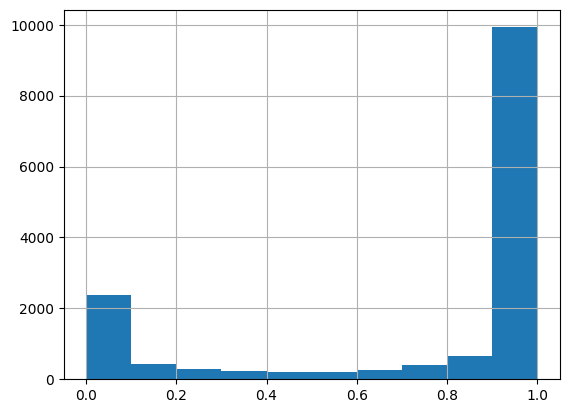

In [87]:
val['score'].hist()